# Simple text classification using ```scikit-learn```

## Import packages


In [1]:
# system tools
import os

# data munging tools
import pandas as pd

# Machine learning stuff
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

## Reading in the data

Our data is already in a tabular format, so we're going to load it using ```pandas```

In [2]:
filename = os.path.join("..", "..","data", "fake-news","fake_or_real_news.csv")

data = pd.read_csv(filename, index_col=0)

__Inspect data__

In [3]:
data.sample(10)

,title,text,label
6398,Ooh Fuck,Wednesday 9 November 2016 by Lucas Wilde Ooh F...,FAKE
6147,Man uses Trump victory as excuse to call ex-gi...,Man uses Trump victory as excuse to call ex-gi...,FAKE
2267,Paul: Laws on sexuality could be more ‘neutral...,Sen. Rand Paul said Saturday that he thinks th...,REAL
1195,"Welcome to Trump County, U.S.A.",It is a little after midnight on a Friday in l...,REAL
5347,Don’t Believe The Myth That Weightlifting Will...,"Many older physical trainers, and even those y...",FAKE
2940,Obama opens door to 'limited' ground combat op...,President Obama on Wednesday opened the door t...,REAL
4385,Indiana Law: Sorting Fact From Fiction From Po...,The culture wars are always percolating beneat...,REAL
6527,Shi’ite Militias Join Iraq’s Mosul Attack,Militia Fighters to Advance on Areas West of C...,FAKE
6395,Chelsea Clinton Hired Eric Braverman As CEO Of...,https://twitter.com/eric_braverman 7. On Doug ...,FAKE
4827,Why Democrats are anxious,"(CNN) Donald Trump's reversal on the ""birther""...",REAL


In [4]:
data.shape

(6335, 3)

<br>
Q: How many examples of each label do we have?

In [5]:
data["label"].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

<br>

Let's now create new variables called ```X``` and ```y```, taking the data out of the dataframe so that we can mess around with them.

In [6]:
X = data["text"]
y = data["label"]

## Train-test split

I've included most of the 'hard work' for you here already, because these are long cells which might be easy to mess up while live-coding.

Instead, we'll discuss what's happening. If you have questions, don't be shy!

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,           # texts for the model
                                                    y,          # classification labels
                                                    test_size=0.2,   # create an 80/20 split
                                                    random_state=42) # random state for reproducibility

## Vectorizing and Feature Extraction

Vectorization. What is it and why are all the cool kids talking about it?

Essentially, vectorization is the process whereby textual or visual data is 'transformed' into some kind of numerical representation. One of the easiest ways to do this is to simple count how often individual features appear in a document.

Take the following text: 
<br><br>
<i>My father’s family name being Pirrip, and my Christian name Philip, my infant tongue could make of both names nothing longer or more explicit than Pip. So, I called myself Pip, and came to be called Pip.</i>
<br>

We can convert this into the following vector

| and | be | being | both | called | came | christian | could | explicit | family | father | i | infant | longer | make | more | my | myself | name | names | nothing | of | or | philip | pip | pirrip | s | so | than | to | tongue|
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |  --- |
| 2 | 1 | 1 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 3 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 3 | 1 | 1 | 1 | 1 | 1 | 1 |

<br>
Our textual data is hence reduced to a jumbled-up 'vector' of numbers, known somewhat quaintly as a <i>bag-of-words</i>.
<br>
<br>
To do this in practice, we first need to create a vectorizer. 

Tfidf vectors tend to be better for training classifiers. Why might that be?

__Create vectorizer object__

In [8]:
vectorizer = TfidfVectorizer(ngram_range = (1,2),     # unigrams and bigrams (1 word and 2 word units)
                             lowercase =  True,       # why use lowercase?
                             max_df = 0.95,           # remove very common words
                             min_df = 0.05,           # remove very rare words
                             max_features = 100)      # keep only top 100 features

This vectorizer is then used to turn all of our documents into a vector of numbers, instead of text.

In [9]:
# first we fit to the training data...
X_train_feats = vectorizer.fit_transform(X_train)

#... then do it for our test data
X_test_feats = vectorizer.transform(X_test)

# get feature names
feature_names = vectorizer.get_feature_names_out()

## Classifying and predicting

We now have to 'fit' the classifier to our data. This means that the classifier takes our data and finds correlations between features and labels.

These correlations are then the *model* that the classifier learns about our data. This model can then be used to predict the label for new, unseen data.

In [10]:
classifier = LogisticRegression(random_state=42).fit(X_train_feats, y_train)

Q: How do we use the classifier to make predictions?

In [11]:
y_pred = classifier.predict(X_test_feats)

Q: What are the predictions for the first 20 examples of the test data?

In [12]:
print(y_pred[:20])

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE'
 'REAL' 'REAL' 'REAL' 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL' 'REAL' 'REAL']


## Evaluate

We can also do some quick calculations, in order to assess just how well our model performs.

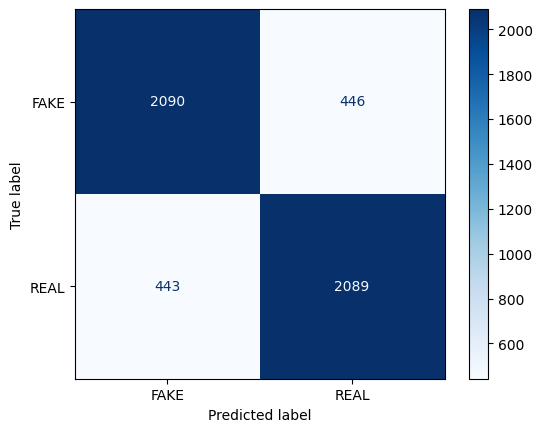

In [13]:
metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in your data arranged alphabetically

__Calculating metrics__

```scikit-learn``` has a built-in set of tools which can be used to calculate these metrics, to get a better idea of how our model is performing.

In [14]:
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.84      0.81      0.82       628
        REAL       0.82      0.85      0.83       639

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



## Save models

It is also somewhat trivial to save models and reload them for later use. For that, we can use the library ```joblib```.

In [15]:
from joblib import dump, load
dump(classifier, "LR_classifier.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

We can restart the kernel for our notebook to see how that works:

In [16]:
from joblib import dump, load
loaded_clf = load("LR_classifier.joblib")
loaded_vect = load("tfidf_vectorizer.joblib")

In [17]:
sentence = "Hilary Clinton is a crook who eats babies!"

In [18]:
test_sentence = loaded_vect.transform([sentence])
loaded_clf.predict(test_sentence)

array(['FAKE'], dtype=object)

## Appendix - Interpreting a confusion matrix

Imagine that we are testing a classifier to see how well it can predict if someone has COVID:


```Accuracy => (TP+TN)/(TP+FP+FN+TN)```
- Ratio of correct classifications across all of the patients

```True Positive Rate => Recall  => Sensitivity => (TP / TP + FN)```
- The proportion of the positive class who were correctly classified
    - I.e sick people correctly identified as being sick

```Precision =>  (TP / TP + FP)```
- The ration of true positives to everyone predicted as positive
    - I.e. the proportion we identify as having COVID who actually do have it

```True negative rate => Specificity => (TN / TN + FP)```
- The proportion of the negative class who were correctly classified
    - I.e. healthy people who were correctly identified as being healthy

The following can also be calculated but are not featured on the confusion matrix above:

```False negative rate => (FN / TP + FN)```
- Proportion of the positive class who were incorrectly classified by the classifier
  - I.e. people predicted as healthy who are actually sick

```False positive rate = (FP / TN + FP) = 1 - Specificity```
- Proportion of the negative class who were incorrectly classified by the classifier
  - I.e. people predicted as sick who are actually healthy

```F1 => 2(P*R / P + R)```
- Harmonic mean of precision and recall, useful where both precision and recall are important